<a href="https://colab.research.google.com/github/JaganMurugan/Learning/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [1]:
import torch

In [ ]:
import torch

In [2]:
import torch

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import time

"""
print(time.time())

time.sleep(2)

start = time.time()

time.sleep(2)

end = time.time()

print("Elapsed time:", end - start)
"""

'\nprint(time.time())\n\ntime.sleep(2)\n\nstart = time.time()\n\ntime.sleep(2)\n\nend = time.time()\n\nprint("Elapsed time:", end - start)\n'

In [ ]:
from typing import Iterable, Tuple
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [ ]:
class LeNet5(nn.Module):
  def __init__(self):
    super().__init__()

    self._body = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2),

        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2)
    )

    self._head = nn.Sequential(
        nn.Linear(in_features=16*5*5, out_features=120),
        nn.ReLU(inplace=True),
        nn.Linear(in_features=120, out_features=84),
        nn.ReLU(inplace=True),
        nn.Linear(in_features=84, out_features=10)
    )

  def forward(self, x):
    x = self._body(x)
    x = x.view(x.size()[0], -1)
    x = self._head(x)

    return x

In [ ]:
lenet = LeNet5()
print(lenet)

LeNet5(
  (_body): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_head): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [ ]:
def get_data(batch_size, data_root='data',num_workers=1):

  train_test_transforms = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor(),
      transforms.Normalize((0.1307), (0.3081))
  ])

  train_loader = torch.utils.data.DataLoader(
      datasets.MNIST(root=data_root, train=True, download=True, transform=train_test_transforms),
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers
  )

  test_loader = torch.utils.data.DataLoader(
      datasets.MNIST(root=data_root, train=False, download=True, transform=train_test_transforms),
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers
  )

  return train_loader, test_loader

In [ ]:
@dataclass
class SystemConfiguration:
  seed: int = 42
  cudnn_benchmark_enabled: bool = True,
  cudnn_determinisitic: bool = True



In [ ]:
@dataclass
class TrainingConfiguration:
  batch_size: int = 32  # amount of data to pass through the network at each forward-backward iteration
  epochs_count: int = 1  # number of times the whole dataset will be passed through the network
  learning_rate: float = 0.01  # determines the speed of network's weights update
  log_interval: int = 100  # how many batches to wait between logging training status
  test_interval: int = 1  # how many epochs to wait before another test. Set to 1 to get val loss at each epoch
  data_root: str = "data"  # folder to save MNIST data (default: data/mnist-data)
  num_workers: int = 10  # number of concurrent processes used to prepare data
  device: str = 'cuda'  # device to use for training.

In [ ]:
import numpy as np

class NearestNeighbor:
  def __init__(self):
    pass

  def train(self, X, y):
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    num_test = X.shape[0]
    Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

    for i in range(num_test):
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis=1)
      min_index = np.argmin(distances)
      Ypred[i] = self.ytr[min_index]

    return Ypred

In [ ]:
import torch

In [ ]:
import torch

In [ ]:

def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> Tuple[float, float]:
  model.train()

  batch_loss = np.array([])

  batch_acc = np.array([])

  for batch_idx, (data, target) in enumerate(train_loader):
       indx_target = target.clone()

       data = data.to(train_config.device)

       target = target.to(train_config.device)

       optimizer.zero_grad()

       output = model(data)

       loss = F.cross_entropy(output, target)

       loss.backward()

       optimizer.step()

       batch_loss = np.append(batch_loss, [loss.item()])

       prob = F.softmax(output, dim=1)

       pred = prob.data.max(dim=1)[1]

       correct = pred.cpu().eq(indx_target).sum()

       acc = float(correct) / float(len(data))

       batch_acc = np.append(batch_acc, [acc])

       if batch_idx % train_config.log_interval == 0 and batch_idx > 0:
        print(
            'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
            epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc)
        )
  epoch_loss = batch_loss.mean()
  epoch_acc = batch_acc.mean()
  return epoch_loss, epoch_acc






In [ ]:
import torch.nn.functional as F

loss = F.cross_entropy(torch.tensor([5.0, 6.0, 7.0]), torch.tensor([5.0, 7.0, 7.0]))

In [ ]:
loss.item()

24.744510650634766

In [ ]:
F.softmax(torch.tensor([[5.0, 6.0, 7.0], [5.0, 6.0, 7.0]]), dim=1)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
import torch

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
class NearestNeighbor:
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N"""
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    num_test = X.shape[0]

    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    for i in range(num_test):
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances)
      Ypred[i] = self.ytr[min_index]

    return Ypred


In [ ]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> Tuple[float, float]:
  model.eval()
  test_loss = 0
  count_correct_predictions = 0

  with torch.no_grad():

    for data, target in test_loader:
      indx_target = target.clone()
      data = data.to(train_config.device)

      target = target.to(train_config.device)

      output = model(data)

      test_loss += F.cross_entropy(output, target).item()

      prob = F.softmax(output, dim=1)

      pred = prob.data.max(dim=1)[1]

      count_correct_predictions += pred.cpu().eq(indx_target).sum()

    test_loss = test_loss / len(test_loader)

    accuracy = 100 * count_correct_predictions /len(test_loader.dataset)

    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_correct_predictions, len(test_loader.dataset), accuracy
        )
    )

    return test_loss, accuracy/100.

In [ ]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

In [ ]:
def main(system_configuration=SystemConfiguration(), training_configuration=TrainingConfiguration()):

    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config,
    # else lower batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 2
        epoch_num_to_set = 5

    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set
    )

    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        epochs_count=epoch_num_to_set,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )

    # initiate model
    model = LeNet5()

    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    # optimizer
    optimizer = optim.SGD(
        model.parameters(),
        lr=training_configuration.learning_rate
    )

    best_loss = torch.tensor(np.inf)

    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])

    # epoch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])

    # training time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):

        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)

        epoch_train_loss = np.append(epoch_train_loss, [train_loss])

        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time

        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)

            epoch_test_loss = np.append(epoch_test_loss, [current_loss])

            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])

            if current_loss < best_loss:
                best_loss = current_loss

    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))

    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

In [ ]:
import time

In [ ]:
model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc = main()

Train Epoch: 0 [1600/60000] Loss: 2.304386 Acc: 0.0625
Train Epoch: 0 [3200/60000] Loss: 2.020136 Acc: 0.3750
Train Epoch: 0 [4800/60000] Loss: 0.966735 Acc: 0.6250
Train Epoch: 0 [6400/60000] Loss: 1.003069 Acc: 0.5625
Train Epoch: 0 [8000/60000] Loss: 1.318518 Acc: 0.6875
Train Epoch: 0 [9600/60000] Loss: 0.402901 Acc: 0.8125
Train Epoch: 0 [11200/60000] Loss: 0.196657 Acc: 1.0000
Train Epoch: 0 [12800/60000] Loss: 0.104711 Acc: 1.0000
Train Epoch: 0 [14400/60000] Loss: 0.796018 Acc: 0.7500
Train Epoch: 0 [16000/60000] Loss: 0.345478 Acc: 0.8750
Train Epoch: 0 [17600/60000] Loss: 0.345221 Acc: 0.8750
Train Epoch: 0 [19200/60000] Loss: 0.066517 Acc: 1.0000
Train Epoch: 0 [20800/60000] Loss: 0.303622 Acc: 0.8750
Train Epoch: 0 [22400/60000] Loss: 0.713501 Acc: 0.8750
Train Epoch: 0 [24000/60000] Loss: 0.120694 Acc: 0.9375
Train Epoch: 0 [25600/60000] Loss: 0.173603 Acc: 0.9375
Train Epoch: 0 [27200/60000] Loss: 0.154132 Acc: 0.8750
Train Epoch: 0 [28800/60000] Loss: 0.264477 Acc: 0.875

In [ ]:
from dataclasses import dataclass
@dataclass
class Sample:
  x: int = 10
  y: int = 11

In [ ]:
sample = Sample()

In [ ]:
sample

Sample(x=10, y=11)

In [ ]:
class samplerepr:
  def __init__(self, x, y):
    self.x = 10
    self.y = 11

  def __repr__(self):
   return f"Point: x={self.x}, y={self.y}"

In [ ]:
sam = samplerepr(10, 11)
sam

Point: x=10, y=11

In [ ]:

import os
models = 'models'
if not os.path.exists(models):
    os.makedirs(models)

model_file_name = 'lenet5_mnist.pt'

model_path = os.path.join(models, model_file_name)

# make sure you transfer the model to cpu.
model.to('cpu')

# save the state_dict
torch.save(model.state_dict(), model_path)

NameError: name 'model' is not defined

In [ ]:
models = 'models'

if not os.path.exists(models):
  os.makedirs(models)

model_file_name = 'lenet5_mnist.pt'

model_path = os.path.join(models, model_file_name)

model.to('cpu')

torch.save(model.state_dict(), model_path)

NameError: name 'model' is not defined

In [ ]:
models = 'models'
if not os.path.exists(models):
  os.makedirs(models)

  model_file_name = 'lenet5_mnist.pt'

  model_path = os.path.join(models, model_file_name)

  model.to('cpu')

  torch.save(model.state_dict(), model_path)

In [ ]:
# initialize the model
lenet5_mnist = LeNet5()

# loading the model and getting model parameters by using load_state_dict
lenet5_mnist.load_state_dict(torch.load(model_path))

FileNotFoundError: [Errno 2] No such file or directory: 'models/lenet5_mnist.pt'

In [ ]:
lenet5_mnist = LeNet5()

lenet5_mnist.load_state_dict(torch.load(model_path)

In [ ]:
lenet5_mnist = LeNet5()

lenet5_mnist.load_state_dict(torch.load(model_path))

In [ ]:
def prediction(model, train_config, batch_input):

    # turn off gradient-computation
    with torch.no_grad():

        # send model to cpu/cuda according to your system configuration
        model.to(train_config.device)

        # it is important to do model.eval() before prediction
        model.eval()

        data = batch_input.to(train_config.device)

        output = model(data)

        # get probability score using softmax
        prob = F.softmax(output, dim=1)

        # get the max probability
        pred_prob = prob.data.max(dim=1)[0]

        # get the index of the max probability
        pred_index = prob.data.max(dim=1)[1]

    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

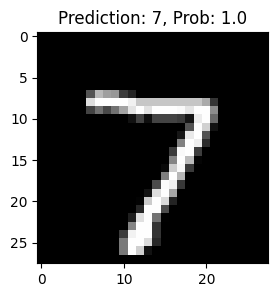

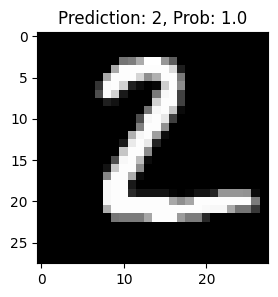

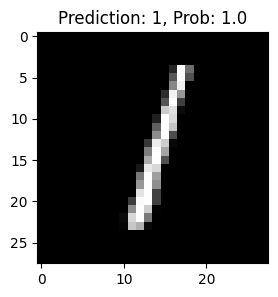

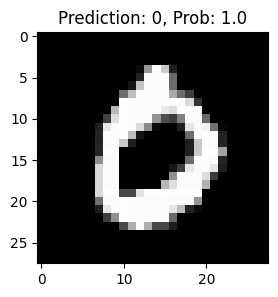

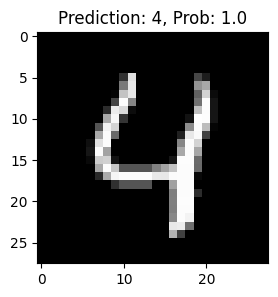

In [ ]:
batch_size = 5
train_config = TrainingConfiguration()

if torch.cuda.is_available():
    train_config.device = "cuda"
else:
    train_config.device = "cpu"

# load test data without image transformation
test = torch.utils.data.DataLoader(
    datasets.MNIST(root=train_config.data_root, train=False, download=True,
                   transform=transforms.functional.to_tensor),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

image_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ), (0.3081, ))
    ])

test_trans = torch.utils.data.DataLoader(
    datasets.MNIST(root=train_config.data_root, train=False, download=True, transform=image_transforms),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

for data, _ in test_trans:
    # pass the loaded model
    pred, prob = prediction(lenet5_mnist, train_config, data)
    break


plt.rcParams["figure.figsize"] = (3, 3)
for images, _ in test:
    for i, img in enumerate(images):
        img = transforms.functional.to_pil_image(img)
        plt.imshow(img, cmap='gray')
        plt.gca().set_title('Prediction: {0}, Prob: {1:.2}'.format(pred[i], prob[i]))
        plt.show()
    break

In [ ]:
import torch

In [ ]:
import torch

In [ ]:
import torch

In [ ]:
import torch